In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# if getting OptionError: "No such keys(s): 'mode.use_inf_as_null'"
# !pip install --upgrade seaborn pandas

import matplotlib as mpl
import os
from glob import glob

from _load_data import * # Getting our specific labels, formatting, and data

# Getting some free samples
results_df.sample()

print(gens)

# Don't change any code below, it may break (probably will) --------------------

['../models/SimplifierTopDownOnlyLast.py', '../models/Vanilla.py', '../models/SimplifierBottomUp1e-2.py', '../models/SimplifierBottomUp1e-4.py', '../models/SimplifierBottomUp1e-6.py', '../models/SimplifierTopDown1e-2.py', '../models/SimplifierBottomUp1e-1.py', '../models/SimplifierBottomUp1e-0.py', '../models/SimplifierTopDown1e-1.py', '../models/SimplifierBottomUp.py', '../models/SimplifierTopDown1e-10.py', '../models/SimplifierBottomUpOnlyLast.py', '../models/SimplifierTopDown1e-6.py', '../models/SimplifierTopDown1e-4.py', '../models/SimplifierBottomUp1e-10.py', '../models/SimplifierTopDown.py', '../models/SimplifierTopDown1e-0.py'] ['Top Down (only last)', 'Without simplify', 'Bottom Up 1e-2', 'Bottom Up 1e-4', 'Bottom Up 1e-6', 'Top Down 1e-2', 'Bottom Up 1e-1', 'Bottom Up 1e-0', 'Top Down 1e-1', 'Bottom Up', 'Top Down 1e-10', 'Bottom Up (only last)', 'Top Down 1e-6', 'Top Down 1e-4', 'Bottom Up 1e-10', 'Top Down', 'Top Down 1e-0']
(2, 14)
['Without simplify' 'Bottom Up']
['Concret

In [2]:
all_data = []
for i, row in results_df.iterrows():
    model, dataset, random_state = row.loc[['model', 'dataset', 'random_state']]

    files = glob(f"{results_path}/{dnames_to_ugly[dataset]}/{nice_to_ugly[model]}/"
                f"*{random_state}_evolution.csv")

    for file in files:
        data = pd.read_csv(file)
        
        for gen in gens:
            try:
                row = data[data['gen']==gen].iloc[0] # should have just 1 row
            except Exception as e:
                print(e)
                # print(file, gen)
                # print(row)
                continue
            
            all_data.append((model, dataset, *row))
            
all_data_df = pd.DataFrame(all_data, 
                           columns=(
                               'model',
                               'dataset',
                               *row.index
                           ))

all_data_df = all_data_df.replace([np.inf, -np.inf], np.nan).dropna()

print(all_data_df.shape)
print(all_data_df['model'].unique())
print(all_data_df['dataset'].unique())
all_data_df.sample(5)

(60, 27)
['Without simplify' 'Bottom Up']
['Concrete']


,model,dataset,gen,evals,best_size,n_simplifications,n_new_hashes,avg train error,avg train size,avg val error,...,std val error,std val size,min train error,min train size,min val error,min val size,max train error,max train size,max val error,max val size
6,Without simplify,Concrete,70.0,80.0,18.0,0.0,0.0,136.474810,17.2125,122.963600,...,4.198185e+01,0.492284,127.564816,15.0,115.181754,15.0,511.741373,18.0,389.299218,18.0
41,Bottom Up,Concrete,110.0,80.0,9.0,25.0,14.0,192.568103,8.9875,198.388369,...,2.599890e+01,0.111102,188.834064,8.0,194.615850,8.0,405.887317,9.0,415.057577,9.0
1,Without simplify,Concrete,20.0,80.0,7.0,0.0,0.0,262.848023,6.4625,243.986731,...,3.524885e+02,1.203575,208.691504,5.0,194.938152,5.0,3753.139971,9.0,3376.559421,9.0
13,Without simplify,Concrete,140.0,80.0,23.0,0.0,0.0,123.649218,22.8250,115.351655,...,2.914471e+01,1.555434,119.724600,9.0,112.072619,9.0,433.694085,23.0,374.395484,23.0
26,Without simplify,Concrete,270.0,80.0,27.0,0.0,0.0,113.803882,27.0000,108.948071,...,1.421085e-14,0.000000,113.803882,27.0,108.948071,27.0,113.803882,27.0,108.948071,27.0


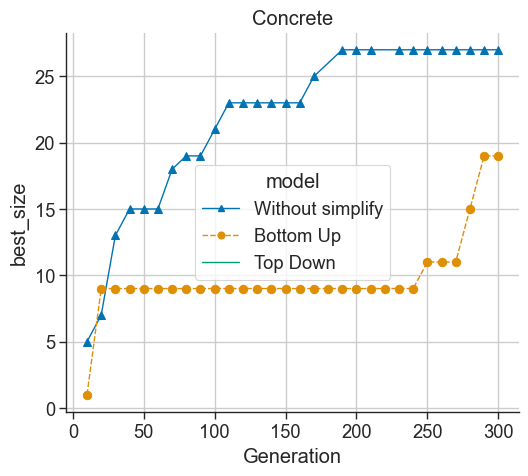

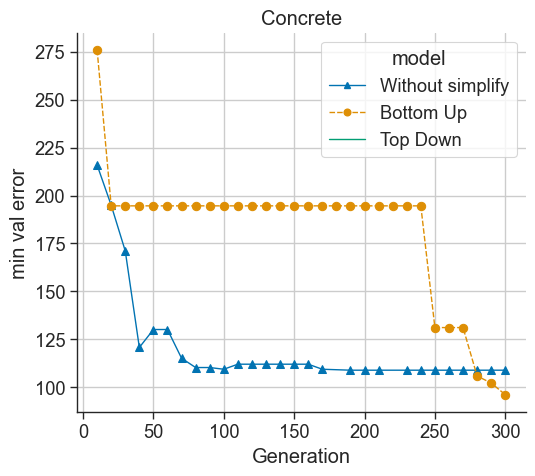

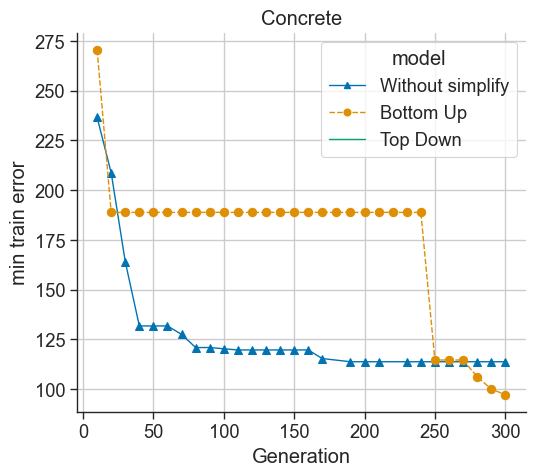

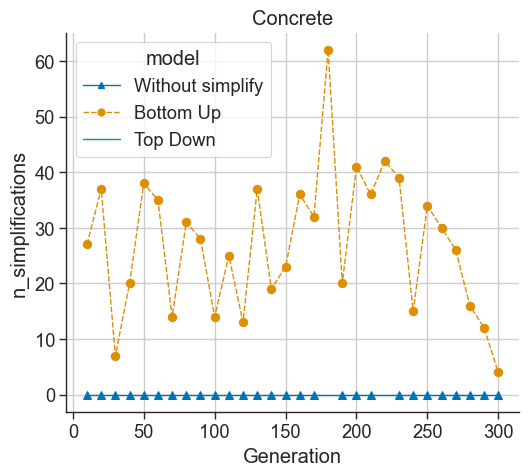

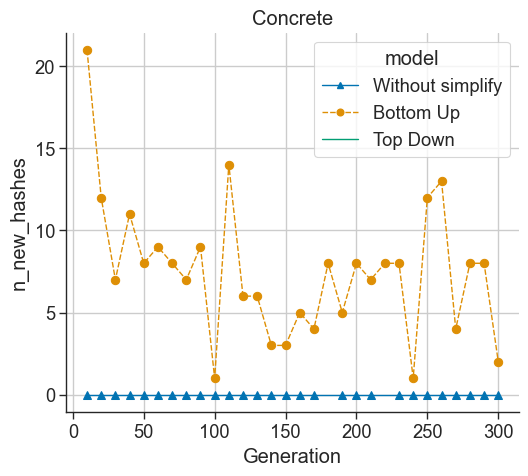

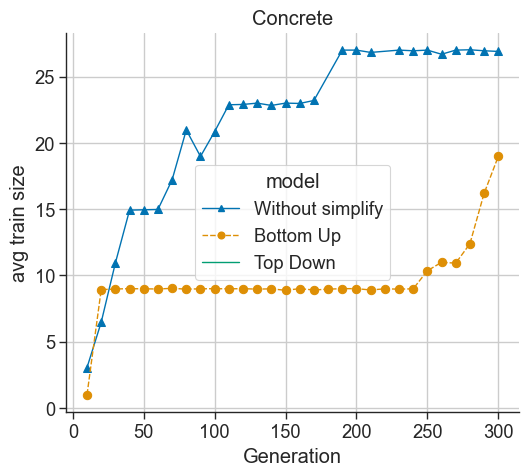

In [3]:
for col in [
    'best_size','min val error', 'min train error',
    'n_simplifications', 'n_new_hashes','avg train size',
    #'med train error','med val error',
]:
    
    # about errors: https://seaborn.pydata.org/tutorial/error_bars.html
    g = sns.relplot(
        data=all_data_df,
        x="gen", y=col, col="dataset", hue="model",
        style="model", col_wrap=col_wrap, markers=marker_choice, markeredgecolor=None, 
        kind="line", facet_kws={'sharey': False, 'sharex': False, 'legend_out':False}, 
        hue_order = order, estimator=np.median, markersize=6,
        
        #err_style='bars', err_kws={'capsize':0.0, 'linewidth':0.0},
        #err_style='bars', err_kws={'capsize':2.0, 'linewidth':0.5}, # 2.0, 0.5
        err_style='band', err_kws={'alpha':0.1},
    )
    g.set_titles("{col_name}")

    for (ds, plot_ax) in g._axes_dict.items():
        plot_ax.grid(which='major', axis='both', linewidth=1)
        plot_ax.set_xlabel("Generation")

    if False: # use log scale
        g.set(xscale="log")
        g.set(yscale="log")

    plt.tight_layout()
    plt.savefig(f"../paper/figs/{col}.pdf")
    plt.savefig(f"../paper/figs/{col}.png")
    plt.show()